In [171]:
import os
print(os.listdir('C:\\Users\\Federico Nada\\Desktop\\DataFest/Notebooks'))

['.ipynb_checkpoints', 'Exploratory Analysis.ipynb', 'Standardize Values.ipynb', 'train.csv', 'train2.csv', 'Untitled.ipynb', 'Workout Strategies.ipynb']


In [170]:
import pandas as pd
import matplotlib.pyplot as plt

ratios = pd.read_csv('C:\\Users\\Federico Nada\\Desktop\\DataFest/Data for DataFest 2019/rpe.csv')

In [172]:
ratios['Date'] =  pd.to_datetime(ratios['Date'])
ratios.set_index('Date', inplace=True)
ratios.sort_values('Date', inplace = True)

In [174]:
import datetime as datetime
enddates = []
enddates.append('11/29/2017')
enddates.append('01/25/2018')
enddates.append('04/12/2018')
enddates.append('05/11/2018')
enddates.append('06/08/2018')
enddates.append('07/20/2018')
enddates = [datetime.datetime.strptime(x, '%m/%d/%Y') for x in enddates]

In [175]:
startdates = []
startdates.append('10/15/2017')
startdates.append('12/02/2017')
startdates.append('01/29/2018')
startdates.append('04/23/2018')
startdates.append('05/14/2018')
startdates.append('06/11/2018')
startdates = [datetime.datetime.strptime(x, '%m/%d/%Y') for x in startdates]

In [176]:
dubai =  ratios.loc[(ratios.index > startdates[0]) & (ratios.index < enddates[0])][['PlayerID' ,'AcuteChronicRatio']]
sydney =  ratios.loc[(ratios.index > startdates[1]) & (ratios.index < enddates[1])][['PlayerID' ,'AcuteChronicRatio']]
commonwealth =  ratios.loc[(ratios.index > startdates[2]) & (ratios.index < enddates[2])][['PlayerID' ,'AcuteChronicRatio']]
langford =  ratios.loc[(ratios.index > startdates[3]) & (ratios.index < enddates[3])][['PlayerID' ,'AcuteChronicRatio']]
paris =  ratios.loc[(ratios.index > startdates[4]) & (ratios.index < enddates[4])][['PlayerID' ,'AcuteChronicRatio']]
world =  ratios.loc[(ratios.index > startdates[5]) & (ratios.index < enddates[5])][['PlayerID' ,'AcuteChronicRatio']]

In [177]:
dubai_d = {}
for x in range(1, 18):
    dubai_d["dubai{0}".format(x)]= dubai[dubai['PlayerID'] == x].groupby(dubai[dubai['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
sydney_d = {}
for x in range(1, 18):
    sydney_d["sydney{0}".format(x)]= sydney[sydney['PlayerID'] == x].groupby(sydney[sydney['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
commonwealth_d = {}
for x in range(1, 18):
    commonwealth_d["commonwealth{0}".format(x)]= commonwealth[commonwealth['PlayerID'] == x].groupby(commonwealth[commonwealth['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
langford_d = {}
for x in range(1, 18):
    langford_d["langford{0}".format(x)]= langford[langford['PlayerID'] == x].groupby(langford[langford['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
paris_d = {}
for x in range(1, 18):
    paris_d["paris{0}".format(x)]= paris[paris['PlayerID'] == x].groupby(paris[paris['PlayerID'] == x].index).first()['AcuteChronicRatio'].values
world_d = {}
for x in range(1, 18):
    world_d["world{0}".format(x)]= world[world['PlayerID'] == x].groupby(world[world['PlayerID'] == x].index).first()['AcuteChronicRatio'].values

In [178]:
data = {**dubai_d, **sydney_d, **commonwealth_d, **langford_d, **paris_d, **world_d}

In [195]:
data_array = []
bins = 10

for i in range(1,18):
    data_array.append(pd.Series(data['dubai{}'.format(i)]).groupby(pd.cut(pd.Series(data['dubai{}'.format(i)]).index, bins)).max().interpolate().values)
for i in range(1,18):
    data_array.append(pd.Series(data['sydney{}'.format(i)]).groupby(pd.cut(pd.Series(data['sydney{}'.format(i)]).index, bins)).max().interpolate().values)
for i in range(1,18):
    data_array.append(pd.Series(data['commonwealth{}'.format(i)]).groupby(pd.cut(pd.Series(data['commonwealth{}'.format(i)]).index, bins)).max().interpolate().values)
for i in (1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17):
    data_array.append(pd.Series(data['langford{}'.format(i)]).groupby(pd.cut(pd.Series(data['langford{}'.format(i)]).index, bins)).max().interpolate().values)
for i in (1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17):
    data_array.append(pd.Series(data['paris{}'.format(i)]).groupby(pd.cut(pd.Series(data['paris{}'.format(i)]).index, bins)).max().interpolate().values)
for i in (1,2,3,4,5,6,7,8,10,11,13,14,15,16,17):
    data_array.append(pd.Series(data['world{}'.format(i)]).groupby(pd.cut(pd.Series(data['world{}'.format(i)]).index, bins)).max().interpolate().values)

In [202]:
ml2 = pd.DataFrame(data_array)
ml2.isna().sum()

0    1
1    1
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [203]:
ml2.to_csv('train_final.csv')

In [204]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for i in range(2,7):
    kmeans = KMeans(n_clusters=i, random_state=10)
    cluster_labels = kmeans.fit_predict(ml2.dropna().values)

    silhouette_avg = silhouette_score(ml2.dropna().values,cluster_labels)
    print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

centers = kmeans.cluster_centers_

For n_clusters = 2 The average silhouette_score is : 0.5564823934367945
For n_clusters = 3 The average silhouette_score is : 0.18945860368846504
For n_clusters = 4 The average silhouette_score is : 0.19137200133653234
For n_clusters = 5 The average silhouette_score is : 0.19376474269230196
For n_clusters = 6 The average silhouette_score is : 0.2101471180446933


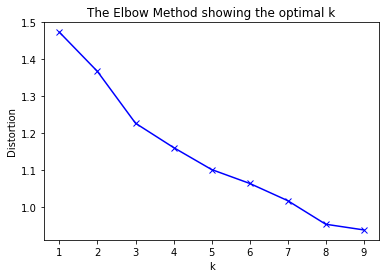

In [205]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(ml2.dropna().values)
    kmeanModel.fit(ml2.dropna().values)
    distortions.append(sum(np.min(cdist(ml2.dropna().values, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / ml2.dropna().values.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [206]:
kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(ml2.dropna().values)
centers = kmeans.cluster_centers_

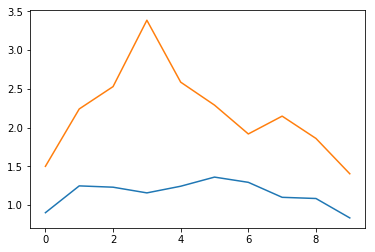

In [207]:
for i in range(2):
    plt.plot(centers[i])

In [189]:
from sklearn.manifold import TSNE

X = TSNE(n_components = 2).fit_transform(ml2.dropna().values)

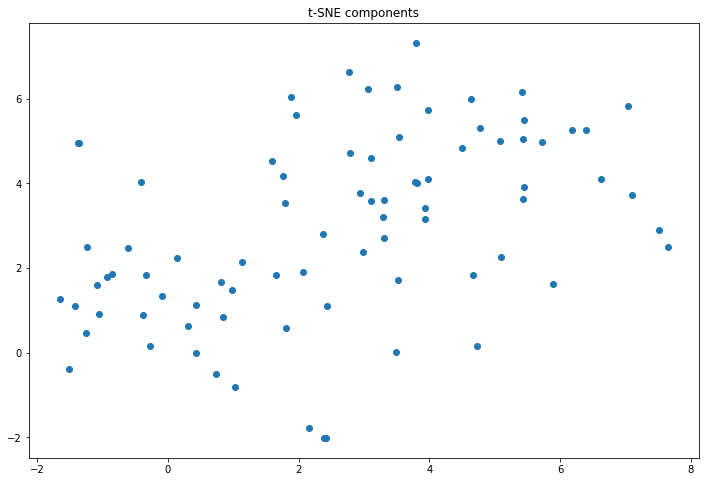

In [190]:
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(X[:,0], X[:,1])

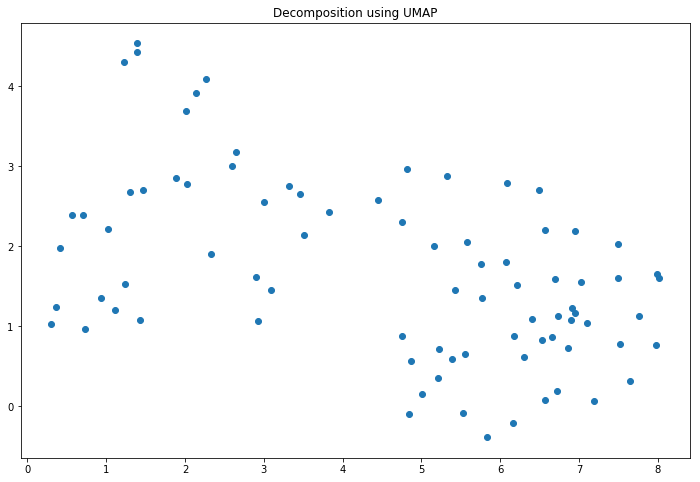

In [191]:
import umap

umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=3, random_state=5).fit_transform(ml2.dropna().values)
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])

In [192]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(ml2.dropna().values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])